In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
print(most_recent_date)

('2017-08-23',)


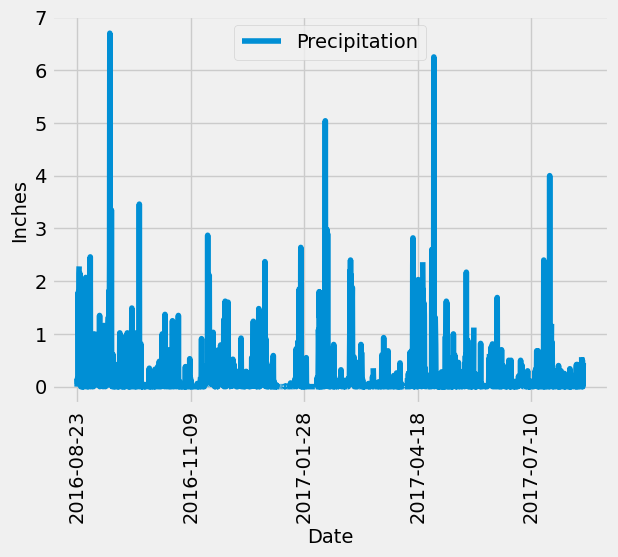

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the date and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data_df = pd.DataFrame(precip_data, columns=["Date", "Precipitation"])
#precip_data_df.head(35)

# Sort the dataframe by date
precip_data_df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot(x="Date",y="Precipitation",xlabel="Date",ylabel="Inches")
plt.xticks(rotation=90)
plt.show()

In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [88]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(Station.station).count()
print(number_of_stations)

9


In [66]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
print(station_counts)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temps = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(station_temps)

[(54.0, 85.0, 71.66378066378067)]


In [85]:
most_recent_date_station = session.query(func.max(Measurement.date)).filter(Measurement.station == 'USC00519281').first()
print(most_recent_date_station)

('2017-08-18',)


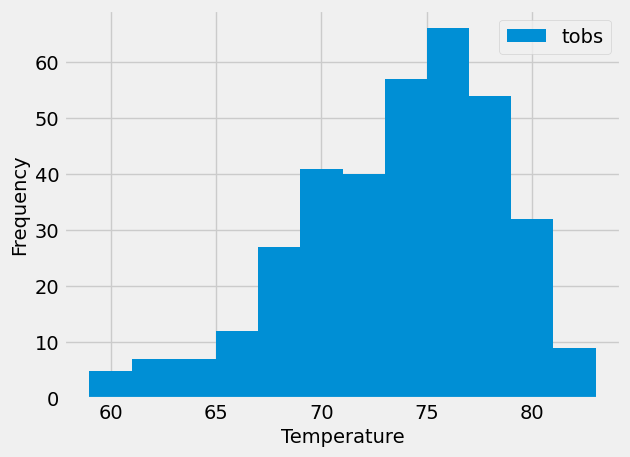

In [84]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date <= '2017-08-18').filter(Measurement.date >= '2016-08-18').all()
#print(active_station_data)
df_active_station_data = pd.DataFrame(active_station_data)
#df_active_station_data.head()
df_active_station_data.plot(kind='hist',ylabel='Frequency',bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [86]:
# Close Session
session.close()